In [4]:
# Importing packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [48]:
df1 = pd.read_csv("Titanic_train.csv")

In [50]:
df2 = pd.read_csv("Titanic_test.csv")

In [52]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df1.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [56]:
df1[df1['Parch'] != 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
10,1,3,female,4.0,1,1,16.7000,G6,S
13,0,3,male,39.0,1,5,31.2750,NaN,S
16,0,3,male,2.0,4,1,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,D35,S
879,1,1,female,56.0,0,1,83.1583,C50,C
880,1,2,female,25.0,0,1,26.0000,NaN,S
885,0,3,female,39.0,0,5,29.1250,NaN,Q


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [60]:
df1['Cabin'].isna().sum()

687

**We will check if missing and non-missing data follows same trend or not**

In [63]:
df1.loc[df1['Cabin'].isna(),'Survived'].value_counts(normalize = True)

Survived
0    0.700146
1    0.299854
Name: proportion, dtype: float64

In [65]:
df1['Survived'].value_counts(normalize = True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [67]:
df1['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

**There is little difference in distribution of passengers who survived between missin cabin data and non_missing cabin data. But since there are 147 uniquev values for cabin, excluding null, we should consider that this is not going to affect the predictability of out data.**

In [70]:
df1.drop(['Cabin'],axis=1,inplace=True)

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [74]:
df1['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [76]:
df1.loc[df1['Embarked'] == 'S','Survived'].value_counts(normalize=True)

Survived
0    0.663043
1    0.336957
Name: proportion, dtype: float64

In [78]:
df1.loc[df1['Embarked'] == 'Q','Survived'].value_counts(normalize=True)

Survived
0    0.61039
1    0.38961
Name: proportion, dtype: float64

In [80]:
df1.loc[df1['Embarked'] == 'C','Survived'].value_counts(normalize=True)

Survived
1    0.553571
0    0.446429
Name: proportion, dtype: float64

In [82]:
df1['Embarked'] = df1['Embarked'].map({'S':0,'C':2,'Q':1})

In [84]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,0.0
1,1,1,female,38.0,1,0,71.2833,2.0
2,1,3,female,26.0,0,0,7.9250,0.0
3,1,1,female,35.0,1,0,53.1000,0.0
4,0,3,male,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,0.0
887,1,1,female,19.0,0,0,30.0000,0.0
888,0,3,female,NaN,1,2,23.4500,0.0
889,1,1,male,26.0,0,0,30.0000,2.0


In [86]:
df1['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

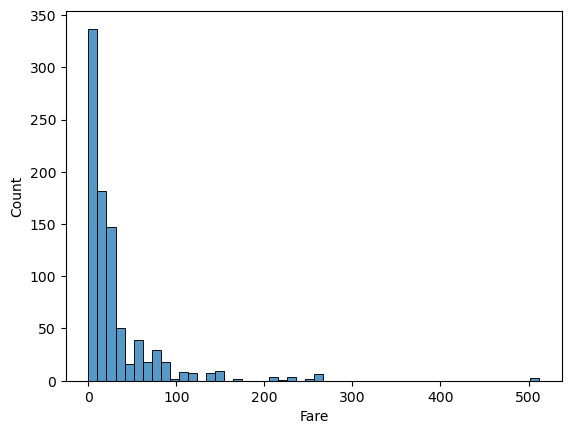

In [88]:
sns.histplot(x=df1['Fare'],bins = 50)
plt.show()

In [90]:
df1['Fare1'] = df1['Fare']

In [92]:
df1['Fare'] = np.where(df1['Fare1']<10,0,np.where(df1['Fare1']<25,1,np.where(df1['Fare1']<50,2,3)))

In [94]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare1
0,0,3,male,22.0,1,0,0,0.0,7.2500
1,1,1,female,38.0,1,0,3,2.0,71.2833
2,1,3,female,26.0,0,0,0,0.0,7.9250
3,1,1,female,35.0,1,0,3,0.0,53.1000
4,0,3,male,35.0,0,0,0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,1,0.0,13.0000
887,1,1,female,19.0,0,0,2,0.0,30.0000
888,0,3,female,NaN,1,2,1,0.0,23.4500
889,1,1,male,26.0,0,0,2,2.0,30.0000


In [96]:
df1.loc[df1['Fare'] == 0,'Survived'].value_counts(normalize = True)

Survived
0    0.800595
1    0.199405
Name: proportion, dtype: float64

In [98]:
df1.loc[df1['Fare'] == 1,'Survived'].value_counts(normalize = True)

Survived
0    0.579186
1    0.420814
Name: proportion, dtype: float64

In [100]:
df1.loc[df1['Fare'] == 2,'Survived'].value_counts(normalize = True)

Survived
0    0.578035
1    0.421965
Name: proportion, dtype: float64

In [102]:
df1.loc[df1['Fare'] == 3,'Survived'].value_counts(normalize = True)

Survived
1    0.677019
0    0.322981
Name: proportion, dtype: float64

In [104]:
df1.drop(['Fare1'],axis=1,inplace=True)

In [106]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,0,0.0
1,1,1,female,38.0,1,0,3,2.0
2,1,3,female,26.0,0,0,0,0.0
3,1,1,female,35.0,1,0,3,0.0
4,0,3,male,35.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,1,0.0
887,1,1,female,19.0,0,0,2,0.0
888,0,3,female,NaN,1,2,1,0.0
889,1,1,male,26.0,0,0,2,2.0


In [108]:
df1['Sex'] = df1['Sex'].map({'male':1,'female':0})

In [110]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,0,0.0
1,1,1,0,38.0,1,0,3,2.0
2,1,3,0,26.0,0,0,0,0.0
3,1,1,0,35.0,1,0,3,0.0
4,0,3,1,35.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,1,0.0
887,1,1,0,19.0,0,0,2,0.0
888,0,3,0,NaN,1,2,1,0.0
889,1,1,1,26.0,0,0,2,2.0


In [171]:
df1.loc[df1['Sex'] == 0,'Survived'].value_counts(normalize = True)

Survived
1    0.742038
0    0.257962
Name: proportion, dtype: float64

In [173]:
df1.loc[df1['Sex'] == 1,'Survived'].value_counts(normalize = True)

Survived
0    0.811092
1    0.188908
Name: proportion, dtype: float64

**Since Pclass and Fare are highly collinear, we are going to drop one of them**

In [184]:

df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,0.0
1,1,1,0,38.0,1,0,2.0
2,1,3,0,26.0,0,0,0.0
3,1,1,0,35.0,1,0,0.0
4,0,3,1,35.0,0,0,0.0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,0.0
887,1,1,0,19.0,0,0,0.0
888,0,3,0,NaN,1,2,0.0
889,1,1,1,26.0,0,0,2.0


In [112]:
test = pd.read_csv('Titanic_test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [192]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [114]:
test.drop(['Name','Ticket', 'Fare', 'Cabin'],axis=1,inplace=True)

In [116]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S
...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,S
414,1306,1,female,39.0,0,0,C
415,1307,3,male,38.5,0,0,S
416,1308,3,male,NaN,0,0,S


In [118]:
test['Sex'] = test['Sex'].map({'male':1,'female':0})

In [120]:
test['Embarked'] = test['Embarked'].map({'S':0,'C':2,'Q':1})

In [122]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,1
1,893,3,0,47.0,1,0,0
2,894,2,1,62.0,0,0,1
3,895,3,1,27.0,0,0,0
4,896,3,0,22.0,1,1,0
...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,0
414,1306,1,0,39.0,0,0,2
415,1307,3,1,38.5,0,0,0
416,1308,3,1,NaN,0,0,0


In [124]:
X = df1.drop(['Survived'],axis=1)

y = df1['Survived']

In [128]:
X = X.drop(['Fare'],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,0.0
1,1,0,38.0,1,0,2.0
2,3,0,26.0,0,0,0.0
3,1,0,35.0,1,0,0.0
4,3,1,35.0,0,0,0.0
...,...,...,...,...,...,...
886,2,1,27.0,0,0,0.0
887,1,0,19.0,0,0,0.0
888,3,0,NaN,1,2,0.0
889,1,1,26.0,0,0,2.0


In [130]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [210]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=45)

rfc.fit(X,y)

RandomForestClassifier(max_depth=5, random_state=45)

In [212]:
y_pred = rfc.predict(test)

In [218]:
test1 = pd.read_csv('Titanic_test.csv')

In [227]:
output = pd.DataFrame({'PassengerId': test1.PassengerId, 'Survived': y_pred})
output.to_csv('submission2.csv', index=False)
print("Your Submission was Successfully Saved.")

Your Submission was Successfully Saved.


In [256]:
# Instantiate model
rf = RandomForestClassifier()

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rfc2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='accuracy')

In [258]:
%%time
rfc2.fit(X,y)

CPU times: total: 9min 13s
Wall time: 9min 44s


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [260]:
rfc2.best_score_

0.8260513877105805

In [262]:
y3 = rfc2.predict(test)

In [264]:
output = pd.DataFrame({'PassengerId': test1.PassengerId, 'Survived': y3})
output.to_csv('submission3.csv', index=False)
print("Your Submission was Successfully Saved.")

Your Submission was Successfully Saved.


In [246]:
# Instantiate model
rf = RandomForestClassifier()

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [0.6],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rfc3 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='accuracy')

In [248]:
%%time
rfc3.fit(X,y)

CPU times: total: 3min 9s
Wall time: 3min 28s


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, None], 'max_features': [0.6],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [250]:
rfc3.best_score_

0.8282985900698905

In [252]:
y4 = rfc3.predict(test)

In [254]:
output = pd.DataFrame({'PassengerId': test1.PassengerId, 'Survived': y4})
output.to_csv('submission4.csv', index=False)
print("Your Submission was Successfully Saved.")

Your Submission was Successfully Saved.


In [132]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,0,0.0
1,1,1,0,38.0,1,0,3,2.0
2,1,3,0,26.0,0,0,0,0.0
3,1,1,0,35.0,1,0,3,0.0
4,0,3,1,35.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,1,0.0
887,1,1,0,19.0,0,0,2,0.0
888,0,3,0,NaN,1,2,1,0.0
889,1,1,1,26.0,0,0,2,2.0


In [134]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,1
1,893,3,0,47.0,1,0,0
2,894,2,1,62.0,0,0,1
3,895,3,1,27.0,0,0,0
4,896,3,0,22.0,1,1,0
...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,0
414,1306,1,0,39.0,0,0,2
415,1307,3,1,38.5,0,0,0
416,1308,3,1,NaN,0,0,0


In [ ]:
X_test = 

In [136]:
xgb1 = XGBClassifier()
xgb1.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [140]:
xgb_1 = xgb1.predict(test.drop(['PassengerId'],axis=1))

In [146]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': xgb_1})
output.to_csv('xgb_1.csv', index=False)
print("Your Submission was Successfully Saved.")

Your Submission was Successfully Saved.


In [152]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb1, X = X, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.59 %
Standard Deviation: 3.13 %


In [154]:
# Instantiate model
xgb = XGBClassifier()

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [0.6],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
xgb2 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=10, refit='accuracy')

In [156]:
xgb2.fit(X,y)

C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [11:21:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features", "max_samples", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [11:21:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features", "max_samples", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [11:21:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-wi

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [3, 5, None], 'max_features': [0.6],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [160]:
xgb_2 = xgb2.predict(test.drop(['PassengerId'],axis=1))

In [162]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': xgb_2})
output.to_csv('xgb_2.csv', index=False)
print("Your Submission was Successfully Saved.")

Your Submission was Successfully Saved.
